In [48]:
import datetime
import pandas as pd
pd.set_option('display.max_columns', 999)
import numpy as np

##Visualization Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [49]:
data_dirPath = 'C:\\Users\\Herat\\OneDrive\\Documents\\Weather Data and Stocks'
data_Stocks = data_dirPath + '\\^AXJO (1).csv'
dfStocks = pd.read_csv(data_Stocks)
dfStocks.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,10/11/2019,6564.299805,6614.600098,6564.299805,6606.799805,6606.799805,526900
1,10/14/2019,6622.500000,6676.200195,6622.500000,6642.600098,6642.600098,489200
2,10/15/2019,6637.000000,6657.399902,6621.899902,6652.000000,6652.000000,504800
3,10/16/2019,6660.000000,6737.799805,6659.700195,6736.500000,6736.500000,626500
4,10/17/2019,6730.500000,6737.399902,6681.399902,6684.700195,6684.700195,871200
5,10/18/2019,6682.799805,6683.200195,6633.899902,6649.700195,6649.700195,633400
6,10/21/2019,6643.500000,6652.500000,6612.399902,6652.500000,6652.500000,506400
7,10/22/2019,6659.100098,6680.399902,6648.299805,6672.200195,6672.200195,577400
8,10/23/2019,6670.000000,6673.200195,6635.700195,6673.100098,6673.100098,557200
9,10/24/2019,6673.100098,6715.200195,6673.100098,6693.600098,6693.600098,559600


In [50]:
def get_percent_nans(df,column_name):
       
    empty = df[column_name].isnull().sum()
            
    #print(empty)
    
    column = df[column_name]
    count = 0
    for value in column:
        count+=1
    
    #print(count)
    scaled = empty/count
    
    return (scaled*100)
    

In [51]:
for col in dfStocks.columns:
    print('The \"{}\" column has {:.2f}% empty values'.format(col,get_percent_nans(dfStocks,col)))

The "Date" column has 0.00% empty values
The "Open" column has 0.00% empty values
The "High" column has 0.00% empty values
The "Low" column has 0.00% empty values
The "Close" column has 0.00% empty values
The "Adj Close" column has 0.00% empty values
The "Volume" column has 0.00% empty values


In [52]:
def get_num_outliers(data_path, col):
    outliers = []
    
    values = sorted(data_path[col])
    #print(values)
    
    quantile2 = np.quantile(values,0.50)
    quantile1 = np.quantile(values,0.25)
    quantile3 = np.quantile(values,0.75)
    #print(quantile3)
    #print(quantile1)
    
    IQR = quantile3 - quantile1
    
    safeZone1 = quantile1 - 1.5*IQR
    safeZone2 = quantile3 + 1.5*IQR
    
    #print(safeZone1)
    #print(safeZone2)
    
    for i in range(len(values)):
        if (values[i] < safeZone1 or values[i] > safeZone2):
            outliers.append(values[i])
            
    #To delete tuples that contain outliers
    
    #data_path.loc[data_path[col].isin(outliers)]
    
    return len(outliers)

In [53]:
for col in dfStocks.columns:
    if col != "Date":
        print('The \"{}\" column has \"{}\" outliers'.format(col,get_num_outliers(dfStocks,col)))

The "Open" column has "5" outliers
The "High" column has "5" outliers
The "Low" column has "6" outliers
The "Close" column has "5" outliers
The "Adj Close" column has "5" outliers
The "Volume" column has "4" outliers


In [54]:
dfStock = dfStocks.drop('High',1).drop('Low',1)
dfStock['Date'] = pd.to_datetime(dfStock['Date'])
dfStock

,Date,Open,Close,Adj Close,Volume
0,2019-10-11,6564.299805,6606.799805,6606.799805,526900
1,2019-10-14,6622.500000,6642.600098,6642.600098,489200
2,2019-10-15,6637.000000,6652.000000,6652.000000,504800
3,2019-10-16,6660.000000,6736.500000,6736.500000,626500
4,2019-10-17,6730.500000,6684.700195,6684.700195,871200
...,...,...,...,...,...
67,2020-01-17,7041.799805,7064.100098,7064.100098,500300
68,2020-01-20,7064.100098,7079.500000,7079.500000,423400
69,2020-01-21,7079.500000,7066.299805,7066.299805,480900
70,2020-01-22,7066.299805,7132.700195,7132.700195,602000


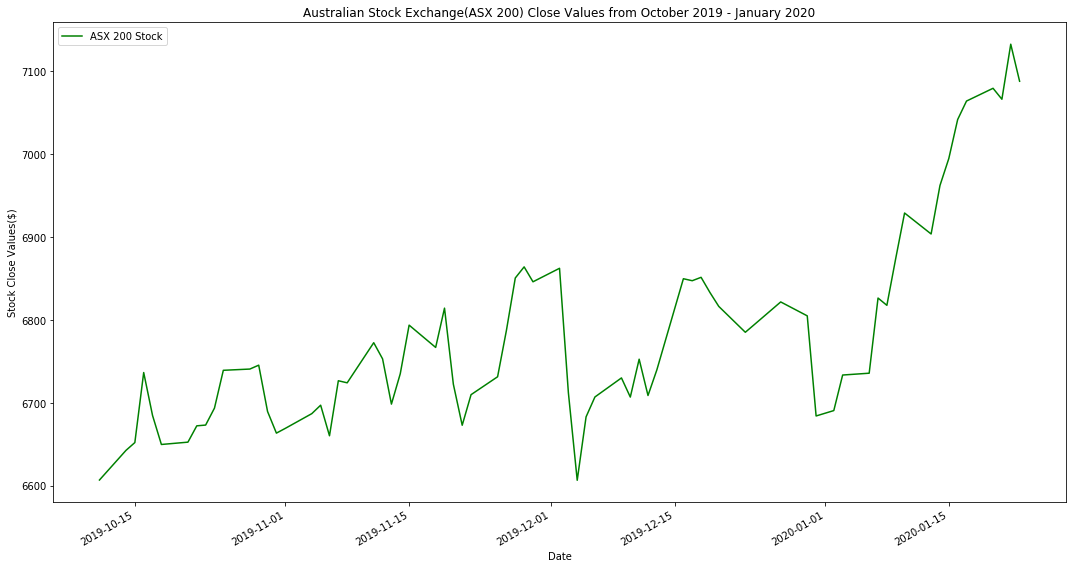

In [55]:
plt.plot(dfStock['Date'], dfStock['Close'], label='ASX 200 Stock', color='green')
plt.gcf().autofmt_xdate()
plt.gcf().set_size_inches(15,8)
plt.ylabel('Stock Close Values($)')
plt.xlabel('Date')
plt.title('Australian Stock Exchange(ASX 200) Close Values from October 2019 - January 2020')
plt.tight_layout()
plt.legend()
plt.show()

In [58]:
dfStock.groupby('Date')['Close'].describe()

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
2019-10-11,1.0,6606.799805,NaN,6606.799805,6606.799805,6606.799805,6606.799805,6606.799805
2019-10-14,1.0,6642.600098,NaN,6642.600098,6642.600098,6642.600098,6642.600098,6642.600098
2019-10-15,1.0,6652.000000,NaN,6652.000000,6652.000000,6652.000000,6652.000000,6652.000000
2019-10-16,1.0,6736.500000,NaN,6736.500000,6736.500000,6736.500000,6736.500000,6736.500000
2019-10-17,1.0,6684.700195,NaN,6684.700195,6684.700195,6684.700195,6684.700195,6684.700195
...,...,...,...,...,...,...,...,...
2020-01-17,1.0,7064.100098,NaN,7064.100098,7064.100098,7064.100098,7064.100098,7064.100098
2020-01-20,1.0,7079.500000,NaN,7079.500000,7079.500000,7079.500000,7079.500000,7079.500000
2020-01-21,1.0,7066.299805,NaN,7066.299805,7066.299805,7066.299805,7066.299805,7066.299805


In [64]:
dfStock.iloc[dfStock['Close'].idxmax()]

Date         2020-01-22 00:00:00
Open                      7066.3
Close                     7132.7
Adj Close                 7132.7
Volume                    602000
Name: 70, dtype: object

In [65]:
dfStock.iloc[dfStock['Close'].idxmin()]

Date         2019-12-04 00:00:00
Open                      6691.7
Close                     6606.5
Adj Close                 6606.5
Volume                    779900
Name: 38, dtype: object

In [9]:
data_F1 = data_dirPath + '\\fire_nrt_V1_101674.csv'
df_Fire = pd.read_csv(data_F1)
df_Fire.head(10)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-41.20464,144.74380,344.8,0.50,0.49,10/1/2019,336,N,VIIRS,n,1.0NRT,291.2,9.2,D
1,-42.77161,146.86771,353.9,0.41,0.45,10/1/2019,336,N,VIIRS,n,1.0NRT,294.2,9.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,10/1/2019,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-41.02530,147.09605,339.7,0.38,0.44,10/1/2019,336,N,VIIRS,n,1.0NRT,292.5,3.1,D
4,-41.02123,147.09540,328.4,0.38,0.44,10/1/2019,336,N,VIIRS,n,1.0NRT,291.3,2.0,D
5,-42.26889,147.31104,336.2,0.39,0.44,10/1/2019,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
6,-42.39329,147.47144,346.9,0.38,0.43,10/1/2019,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
7,-42.69706,147.70634,333.6,0.57,0.43,10/1/2019,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
8,-42.69701,147.70584,334.1,0.56,0.43,10/1/2019,336,N,VIIRS,n,1.0NRT,293.5,4.1,D
9,-41.48875,146.64394,338.7,0.41,0.45,10/1/2019,336,N,VIIRS,n,1.0NRT,294.0,4.8,D


In [10]:
df_Fire.drop('latitude',1).drop('longitude',1).drop('satellite',1).drop('instrument',1).drop('confidence',1)

,bright_ti4,scan,track,acq_date,acq_time,version,bright_ti5,frp,daynight
0,344.8,0.50,0.49,10/1/2019,336,1.0NRT,291.2,9.2,D
1,353.9,0.41,0.45,10/1/2019,336,1.0NRT,294.2,9.9,D
2,327.9,0.46,0.47,10/1/2019,336,1.0NRT,295.3,3.7,D
3,339.7,0.38,0.44,10/1/2019,336,1.0NRT,292.5,3.1,D
4,328.4,0.38,0.44,10/1/2019,336,1.0NRT,291.3,2.0,D
...,...,...,...,...,...,...,...,...,...
1013965,302.6,0.39,0.44,1/30/2020,1712,1.0NRT,287.2,1.0,N
1013966,309.1,0.39,0.44,1/30/2020,1712,1.0NRT,286.8,1.5,N
1013967,298.1,0.39,0.44,1/30/2020,1712,1.0NRT,285.9,0.9,N
1013968,306.1,0.39,0.44,1/30/2020,1712,1.0NRT,286.6,1.1,N


In [11]:
for col in df_Fire.columns:
    print('The \"{}\" column has {:.2f}% empty values'.format(col,get_percent_nans(df_Fire,col)))

The "latitude" column has 0.00% empty values
The "longitude" column has 0.00% empty values
The "bright_ti4" column has 0.00% empty values
The "scan" column has 0.00% empty values
The "track" column has 0.00% empty values
The "acq_date" column has 0.00% empty values
The "acq_time" column has 0.00% empty values
The "satellite" column has 0.00% empty values
The "instrument" column has 0.00% empty values
The "confidence" column has 0.00% empty values
The "version" column has 0.00% empty values
The "bright_ti5" column has 0.00% empty values
The "frp" column has 0.00% empty values
The "daynight" column has 0.00% empty values
